In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns


import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

LSTM-multivariate 

In [65]:
netflix=pd.read_csv('../input/netflix-stock-price-data-set-20022022/NFLX.csv')

In [66]:
dtr=netflix.iloc[:, 1: 5].values

In [67]:
cut = int(len(netflix)*0.8)

x_train=netflix[:cut].drop(['Date','Volume'],axis=1)
#y_train=train[:cut]['Close']
x_test = netflix[cut:].drop(['Date','Volume'],axis=1)
#y_test=train[cut:]['Close']

In [68]:
x=netflix[:cut]
x.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [69]:
x1=netflix[cut:]
x1.head()


,Date,Open,High,Low,Close,Adj Close,Volume
4035,2018-06-04,362.679993,363.000000,355.510010,361.809998,361.809998,7682000
4036,2018-06-05,363.320007,369.829987,361.410004,365.799988,365.799988,8358000
4037,2018-06-06,367.779999,369.679993,363.329987,367.450012,367.450012,7712300
4038,2018-06-07,368.540009,368.700012,357.799988,361.399994,361.399994,8278000
4039,2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700


In [70]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(x_train)

In [71]:
x = []
y = []
for i in range(30, x_train.shape[0]):
    list1=[]
    #a1=training_set_scaled[i-30:i, 0] #High
    a=training_set_scaled[i-30:i, 1] #High
    b=training_set_scaled[i-30:i, 2] #Low
    c=training_set_scaled[i-30:i, 3] #Close 
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    x.append(list1)
    y.append(training_set_scaled[i, 0]) #Open
x = np.array(x) 
y = np.array(y)
y=y.reshape(-1,1)

In [72]:
x.shape

(4005, 3, 30)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (x.shape[1], 30)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 3, 50)             16200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 50)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 36,451
Trainable params: 36,451
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
model.fit(x = x, y = y, batch_size = 32, epochs = 15)

Epoch 1/15
126/126 [==============================] - 6s 10ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 2/15
126/126 [==============================] - 1s 10ms/step - loss: 2.7586e-04 - mean_squared_error: 2.7586e-04
Epoch 3/15
126/126 [==============================] - 1s 10ms/step - loss: 2.4826e-04 - mean_squared_error: 2.4826e-04
Epoch 4/15
126/126 [==============================] - 1s 10ms/step - loss: 1.8943e-04 - mean_squared_error: 1.8943e-04
Epoch 5/15
126/126 [==============================] - 1s 10ms/step - loss: 1.9857e-04 - mean_squared_error: 1.9857e-04
Epoch 6/15
126/126 [==============================] - 1s 10ms/step - loss: 1.6148e-04 - mean_squared_error: 1.6148e-04
Epoch 7/15
126/126 [==============================] - 1s 10ms/step - loss: 2.0432e-04 - mean_squared_error: 2.0432e-04
Epoch 8/15
126/126 [==============================] - 1s 10ms/step - loss: 1.4281e-04 - mean_squared_error: 1.4281e-04
Epoch 9/15
126/126 [==============================] - 1s

In [75]:
c=x_train.count()['Open']
new=x_train[c-30:].append(x_test,ignore_index=True)
dte=new.iloc[:, 0: 5].values
test_set_scaled = sc.transform(dte)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [76]:
predicted_list=[]
a1=new.count()['Open']
a2=x_test.count()['Open']
#print(a1,a2)
#print(test.count()['Open'])
k=0
inputs=[]
for i in range(a1-a2,a1): #500-40=460,500
    k+=1
    #j=i+a2
    list1=[]
    #print(i)
    #a1=test_set_scaled[i-30:i,0]
    a=test_set_scaled[i-30:i,1]
    #print(a)
    b=test_set_scaled[i-30:i,2]
    c=test_set_scaled[i-30:i,3]
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    inputs.append(list1)

In [77]:
inputs=np.array(inputs)
predicted_stock_price = model.predict(inputs)

In [78]:
y_test=x_test['Open']

In [79]:
predicted_stock_price.shape

(1009, 1)

In [80]:
val=list()
for i in range(1009):
  n=[0]
  val.append(n)
p=np.append(predicted_stock_price,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)

In [81]:
pred = sc.inverse_transform(p)

In [82]:
np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)[:,0]),2)))  #RMSE

52.434600759089946

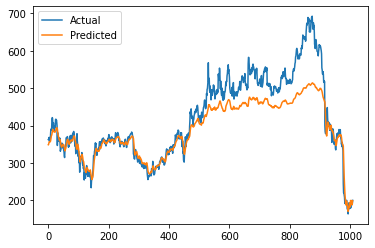

In [83]:
plt.plot(y_test.tolist(),label='Actual')
plt.plot(pred[:,0],label='Predicted')
plt.legend()

Using sliding window of 45

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
x = []
y = []
for i in range(45, x_train.shape[0]):
    list1=[]
    #a1=training_set_scaled[i-30:i, 0] #High
    a=training_set_scaled[i-45:i, 1] #High
    b=training_set_scaled[i-45:i, 2] #Low
    c=training_set_scaled[i-45:i, 3] #Close 
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    x.append(list1)
    y.append(training_set_scaled[i, 0]) #Open
x = np.array(x) 
y = np.array(y)
y=y.reshape(-1,1)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (x.shape[1], 45)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(x = x, y = y, batch_size = 32, epochs = 15)




Epoch 1/15
125/125 [==============================] - 5s 10ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 2/15
125/125 [==============================] - 1s 10ms/step - loss: 3.8432e-04 - mean_squared_error: 3.8432e-04
Epoch 3/15
125/125 [==============================] - 2s 14ms/step - loss: 3.2551e-04 - mean_squared_error: 3.2551e-04
Epoch 4/15
125/125 [==============================] - 1s 10ms/step - loss: 2.8151e-04 - mean_squared_error: 2.8151e-04
Epoch 5/15
125/125 [==============================] - 1s 10ms/step - loss: 2.0791e-04 - mean_squared_error: 2.0791e-04
Epoch 6/15
125/125 [==============================] - 1s 10ms/step - loss: 1.9776e-04 - mean_squared_error: 1.9776e-04
Epoch 7/15
125/125 [==============================] - 1s 11ms/step - loss: 2.2615e-04 - mean_squared_error: 2.2615e-04
Epoch 8/15
125/125 [==============================] - 1s 10ms/step - loss: 1.3675e-04 - mean_squared_error: 1.3675e-04
Epoch 9/15
125/125 [==============================] - 1s

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


61.38470818627786


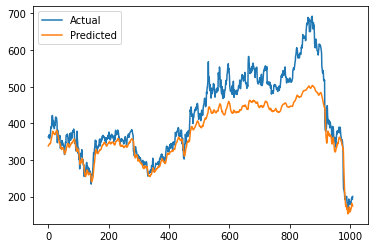

In [85]:
c=x_train.count()['Open']
new=x_train[c-45:].append(x_test,ignore_index=True)
dte=new.iloc[:, 0: 5].values
test_set_scaled = sc.transform(dte)
predicted_list=[]
a1=new.count()['Open']
a2=x_test.count()['Open']
#print(a1,a2)
#print(test.count()['Open'])
predicted_list=[]
a1=new.count()['Open']
a2=x_test.count()['Open']
#print(a1,a2)
#print(test.count()['Open'])
k=0
inputs=[]
for i in range(a1-a2,a1): #500-40=460,500
    k+=1
    #j=i+a2
    list1=[]
    #print(i)
    #a1=test_set_scaled[i-30:i,0]
    a=test_set_scaled[i-45:i,1]
    #print(a)
    b=test_set_scaled[i-45:i,2]
    c=test_set_scaled[i-45:i,3]
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    inputs.append(list1)
inputs=np.array(inputs)
#inputs=inputs.reshape((inputs.shape[0],inputs.shape[1],1))
predicted_stock_price = model.predict(inputs)
y_test=x_test['Open']
val=list()
for i in range(1009):
  n=[0]
  val.append(n)
p=np.append(predicted_stock_price,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)
pred = sc.inverse_transform(p)
print(np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)[:,0]),2)))) #RMSE
plt.plot(y_test.tolist(),label='Actual')
plt.plot(pred[:,0],label='Predicted')
plt.legend()

Using sliding window of 60

In [86]:

x = []
y = []
for i in range(60, x_train.shape[0]):
    list1=[]
    #a1=training_set_scaled[i-30:i, 0] #High
    a=training_set_scaled[i-60:i, 1] #High
    b=training_set_scaled[i-60:i, 2] #Low
    c=training_set_scaled[i-60:i, 3] #Close 
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    x.append(list1)
    y.append(training_set_scaled[i, 0]) #Open
x = np.array(x) 
y = np.array(y)
y=y.reshape(-1,1)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (x.shape[1], 60)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(x = x, y = y, batch_size = 32, epochs = 15)




Epoch 1/15
125/125 [==============================] - 5s 10ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 2/15
125/125 [==============================] - 1s 10ms/step - loss: 3.3920e-04 - mean_squared_error: 3.3920e-04
Epoch 3/15
125/125 [==============================] - 1s 10ms/step - loss: 3.0826e-04 - mean_squared_error: 3.0826e-04
Epoch 4/15
125/125 [==============================] - 1s 10ms/step - loss: 2.5932e-04 - mean_squared_error: 2.5932e-04
Epoch 5/15
125/125 [==============================] - 1s 10ms/step - loss: 2.3865e-04 - mean_squared_error: 2.3865e-04
Epoch 6/15
125/125 [==============================] - 1s 10ms/step - loss: 3.5882e-04 - mean_squared_error: 3.5882e-04
Epoch 7/15
125/125 [==============================] - 1s 12ms/step - loss: 2.0792e-04 - mean_squared_error: 2.0792e-04
Epoch 8/15
125/125 [==============================] - 2s 13ms/step - loss: 1.5227e-04 - mean_squared_error: 1.5227e-04
Epoch 9/15
125/125 [==============================] - 1s

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


55.29729071224539


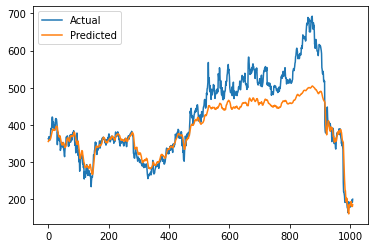

In [87]:
c=x_train.count()['Open']
new=x_train[c-60:].append(x_test,ignore_index=True)
dte=new.iloc[:, 0: 5].values
test_set_scaled = sc.transform(dte)
predicted_list=[]
a1=new.count()['Open']
a2=x_test.count()['Open']
#print(a1,a2)
#print(test.count()['Open'])
predicted_list=[]
a1=new.count()['Open']
a2=x_test.count()['Open']
#print(a1,a2)
#print(test.count()['Open'])
k=0
inputs=[]
for i in range(a1-a2,a1): #500-40=460,500
    k+=1
    #j=i+a2
    list1=[]
    #print(i)
    #a1=test_set_scaled[i-30:i,0]
    a=test_set_scaled[i-60:i,1]
    #print(a)
    b=test_set_scaled[i-60:i,2]
    c=test_set_scaled[i-60:i,3]
    #list1.append(a1)
    list1.append(a)
    list1.append(b)
    list1.append(c)
    inputs.append(list1)
inputs=np.array(inputs)
#inputs=inputs.reshape((inputs.shape[0],inputs.shape[1],1))
predicted_stock_price = model.predict(inputs)
y_test=x_test['Open']
val=list()
for i in range(1009):
  n=[0]
  val.append(n)
p=np.append(predicted_stock_price,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)
p=np.append(p,val,axis=1)
pred = sc.inverse_transform(p)
print(np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)[:,0]),2)))) #RMSE
plt.plot(y_test.tolist(),label='Actual')
plt.plot(pred[:,0],label='Predicted')
plt.legend()

LSTM univariate-Opening

In [88]:
dtr=netflix.iloc[:, 1: 2].values

In [89]:
cut = int(len(netflix)*0.8)

x_train=netflix[:cut]['Open']
#y_train=train[:cut]['Close']
x_test = netflix[cut:]['Open']
#y_test=train[cut:]['Close']

In [90]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(x_train.values.reshape(-1,1))

In [91]:
x = []
y = []
for i in range(30, x_train.shape[0]):
    a=training_set_scaled[i-30:i, 0]
    x.append(a)
    y.append(training_set_scaled[i, 0]) 
x = np.array(x) 
y = np.array(y)
y=y.reshape(-1,1)

In [92]:
x.shape

(4005, 30)

In [93]:
x=x.reshape(x.shape[0],x.shape[1],-1)
x.shape

(4005, 30, 1)

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (x.shape[1], 1)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [95]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 30, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.fit(x = x, y = y, batch_size = 32, epochs = 15)

Epoch 1/15
126/126 [==============================] - 10s 49ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 2/15
126/126 [==============================] - 6s 49ms/step - loss: 1.9201e-04 - mean_squared_error: 1.9201e-04
Epoch 3/15
126/126 [==============================] - 7s 54ms/step - loss: 2.1411e-04 - mean_squared_error: 2.1411e-04
Epoch 4/15
126/126 [==============================] - 6s 49ms/step - loss: 2.4273e-04 - mean_squared_error: 2.4273e-04
Epoch 5/15
126/126 [==============================] - 6s 48ms/step - loss: 1.8750e-04 - mean_squared_error: 1.8750e-04
Epoch 6/15
126/126 [==============================] - 6s 49ms/step - loss: 1.6318e-04 - mean_squared_error: 1.6318e-04
Epoch 7/15
126/126 [==============================] - 6s 49ms/step - loss: 1.6949e-04 - mean_squared_error: 1.6949e-04
Epoch 8/15
126/126 [==============================] - 7s 54ms/step - loss: 1.5949e-04 - mean_squared_error: 1.5949e-04
Epoch 9/15
126/126 [==============================] - 6

In [97]:
c=x_train.count()
new=x_train[c-30:].append(x_test,ignore_index=True)
dte=new.iloc[:].values
test_set_scaled = sc.transform(dte.reshape(-1,1))

In [98]:
predicted_list=[]
a1=new.count()
a2=x_test.count()
#print(a1,a2)
#print(test.count()['Open'])
k=0
inputs=[]
for i in range(a1-a2,a1): #500-40=460,500
    #print(i)
    a=test_set_scaled[i-30:i,0]
    inputs.append(a)

In [99]:
inputs=np.array(inputs)
inputs=inputs.reshape((inputs.shape[0],inputs.shape[1],1))
print(inputs.shape)
predicted_stock_price = model.predict(inputs)

(1009, 30, 1)


In [100]:
predictions = sc.inverse_transform(predicted_stock_price)

In [101]:
np.sqrt(np.mean(np.power((np.array(x_test)-np.array(predictions)[:,0]),2)))

19.57861619578273

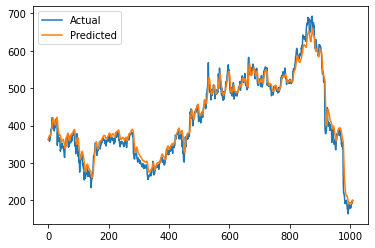

In [102]:
plt.plot(x_test.tolist(),label='Actual')
plt.plot(predictions,label='Predicted')
plt.legend()